In [1]:
import numpy as np # for most parts we use numpy
import math # only for using sqrt
import matplotlib.pyplot as plt # for plotting results

## producing data

In [2]:
# np.random.seed(16) # We set a random seed to anything to ensure that the resul
                   #ts are similar every time we run the code.
x = np.random.rand(200) # 200 random numbers for x
y = np.random.rand(200) # 200 random numbers for y

In [3]:
# shifting numbers to [0,1000]
x = x*1000
y = y*1000

## K-Means

In [4]:
def dist(coor1, coor2):  # nothing but a 2D cathesian distance calculator.
    dist = math.sqrt((coor1[0] - coor2[0])**2 + (coor1[1] - coor2[1])**2)
    return dist


def K_det(
        k_counts, k_coors, x, y):
    """This function identifies which point is associated to which centroid.
    k_counts: count of centroids
    k_coors: initial coordinate for all centroids. only one np.array(x,y)
    x: x value of all points. np.array
    y: y value of all points. np.array
    output: a numpy array in size of x(or y) telling nearest centroid to every
    point."""
    k_det = np.zeros(x.shape)
    dists = np.zeros(k_counts)
    for index in range(len(x)):
        for k in range(k_counts):
            dists[k] = dist((k_coors[k, :]), (x[index], y[index]))
        k_det[index] = np.where(dists == min(dists))[
            0][0]  # finding nearest cen
        # troid to each point
    return k_det


def k_new_coors(k_counts, x, y, k_det):
    """having k_det array calculates new coordinate for every centroid
    k_counts: count of centroids
    x: x value of all points. np.array
    y: y value of all points. np.array
    k_det: np.array telling nearest centroid index for each point.
    output: new coordinate for every centroid in a numpy.array"""
    sums = np.zeros((k_counts, 2))
    counts = np.zeros(k_counts)
    # calculating mean for all points associated with a centroid.
    for k in range(k_counts):
        for index in range(len(k_det)):
            if (k_det[index] == k):
                # only for a centroid at a time.
                sums[k, :] = sums[k, :] + [x[index], y[index]]
        counts[k] = sum(k_det == k)  # count of points associated to a centroid
        sums[k, :] = sums[k, :]/counts[k]  # mean = sum/count
    return sums  # this is actually the mean, not sum anymore. mean=new coordinate for each centroid


def kmeans_error(new_coors, x, y, k_counts, k_det):
    """given new coordinate for each centroid and x,y of each point, this function calculates squarred
    distance of each point to associated centroid. summation of all s-distances will be the kmeans error(output)
    new_coors: new coordinate of each centroid in a numpy.array
    x: x value of all points. np.array
    y: y value of all points. np.array
    k_counts: count of centroids
    k_det: np.array telling nearest centroid index for each point. numpy.array
    output: squarred error. cost function for kmeans
    """
    e = 0
    for k in range(k_counts):
        for index in range(len(k_det)):
            if (k_det[index] == k):
                dis = dist(new_coors[k, :], (x[index], y[index]))
                e = e + (dis**2)
    error = e/len(x)
    return error


def kmeans(k_counts, x, y, threshold):
    """given centroid counts and 2D coordinates of points, this function
    calculates best position of each centroid considering maximum error as threshold
    k_counts: count of centroids
    x: x value of all points. np.array
    y: y value of all points. np.array
    threshold: maximum acceptible error for calculations
    output: best coordinates for centroids
    !!! attentions: since to random initial position of centroids,
    repeating might be required.!!!
    """
    error_hist = [9999999999999]
    error_dif = 99999999999999
    k_coors = np.random.rand(k_counts, 2)
    new_coors = k_coors
    while(error_dif > threshold):
        k_det = K_det(k_counts, new_coors, x, y)
        new_coors = k_new_coors(k_counts, x, y, k_det)
        new_error = kmeans_error(new_coors, x, y, k_counts, k_det)
        error_dif = error_hist[-1] - new_error
        print(error_dif)
        error_hist.append(new_error)
        if (error_dif < 0):
            print("negative error difference! local optima!")
    return new_coors

In [5]:
final_coors = kmeans(3, x, y, 10) # example of using functions

9999999891454.887
2327.6680664268642
3242.1089650724753
2584.478598135349
1336.5443593765958
698.1029206649255
322.41782060518744
0.0


C:\Users\mojta\AppData\Local\Temp/ipykernel_9800/2367137020.py:42: RuntimeWarning: invalid value encountered in true_divide
  sums[k, :] = sums[k, :]/counts[k]  # mean = sum/count


In [6]:
final_coors

array([[519.43438121, 211.75290579],
       [         nan,          nan],
       [535.6080311 , 729.27535264]])

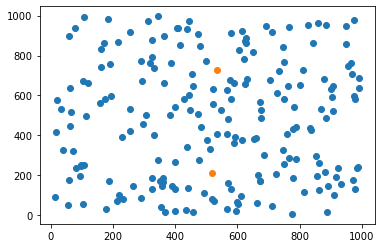

In [7]:
plt.scatter(x,y)
plt.scatter(final_coors[:,0],final_coors[:,1]) # results look fine, but for better understanding we make another set(not random this time)

## not random example

In [8]:
x1 = np.random.rand(50)*100
y1 = np.random.rand(50)*100
x2 = np.random.rand(50)*100+50
y2 = np.random.rand(50)*100+50
x3 = np.random.rand(50)*100+100
y3 = np.random.rand(50)*100+100
x4 = np.random.rand(50)*100+150
y4 = np.random.rand(50)*100+150

In [9]:
x = np.concatenate((x1, x2, x3, x4), axis=0)
y = np.concatenate((y1, y2, y3, y4), axis=0)

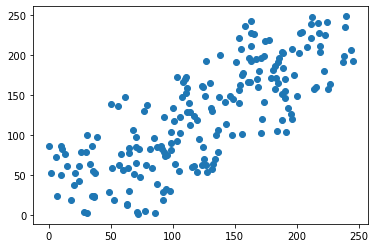

In [10]:
plt.scatter(x, y)

In [19]:
final_coors2 = kmeans(3, x, y, 10)

9999999992782.635
4355.659509583283
821.0001049916309
180.5269004307056
48.45856809203406
31.87003075421194
27.1350234102365
4.448828894435792


In [20]:
final_coors2

array([[115.45111652, 110.85298927],
       [ 47.65423984,  48.81139466],
       [189.33954202, 190.42672343]])

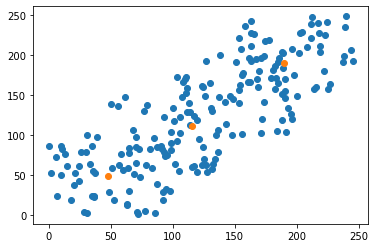

In [21]:
plt.scatter(x, y)
plt.scatter(final_coors2[:,0],final_coors2[:,1])

In [34]:
x1 = np.random.rand(50)*100
y1 = np.random.rand(50)*100
x2 = np.random.rand(50)*80+50
y2 = np.random.rand(50)*80+50
x3 = np.random.rand(50)*20+100
y3 = np.random.rand(50)*20+100
x4 = np.random.rand(50)*120+150
y4 = np.random.rand(50)*120+150

In [58]:
x = np.concatenate((x1, x2, x3, x4), axis=0)
y = np.concatenate((y1, y2, y3, y4), axis=0)

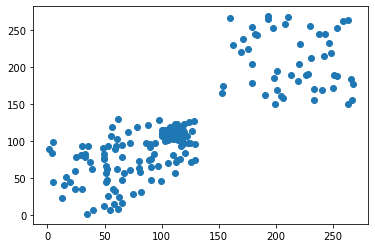

In [36]:
plt.scatter(x, y)

In [40]:
final_coors3 = kmeans(2, x, y, 10)

9999999992283.965
3271.1262525678876
1914.7461520655424
296.5308831065595
0.0


In [70]:
final_coors3

array([[215.24249421, 209.17613552],
       [ 85.29684716,  86.45387911]])

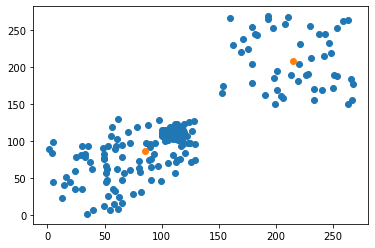

In [41]:
plt.scatter(x, y)
plt.scatter(final_coors3[:,0],final_coors3[:,1])

## Kmeans using sklearn

In [44]:
!pip install scikit-learn

In [46]:
from sklearn.cluster import KMeans

In [73]:
x = np.reshape(x, (200, 1))  # (sample, feature) foramt

In [63]:
y = np.reshape(y, (200, 1))  # (sample, feature) foramt

In [67]:
X = np.concatenate((x, y), axis=1)  # all features as one array input

In [74]:
model = KMeans(2, max_iter=200)  # 2 is the number of centroids

In [72]:
k_det_sklearn = model.fit_predict(X)

In [71]:
model.cluster_centers_  # as you can see, results are so close to ours

array([[215.24249421, 209.17613552],
       [ 85.29684716,  86.45387911]])